In [30]:
import lightkurve as lk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend

InlineBackend(InlineBackendConfig) options
----------------------------------------
InlineBackend.close_figures=<Bool>
    Close all figures at the end of each cell.
    When True, ensures that each cell starts with no active figures, but it also
    means that one must keep track of references in order to edit or redraw
    figures in subsequent cells. This mode is ideal for the notebook, where
    residual plots from other cells might be surprising.
    When False, one must call figure() to create new figures. This means that
    gcf() and getfigs() can reference figures created in other cells, and the
    active figure can continue to be edited with pylab/pyplot methods that
    reference the current active figure. This mode facilitates iterative editing
    of figures, and behaves most consistently with other matplotlib backends,
    but figure barriers between cells must be explicit.
    Current: True
InlineBackend.figure_format=<Unicode>
    The figure format to enable (deprecate

In [31]:
name = 'HD_186994'
lc = lk.search_lightcurve(name)
lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,272368236,0.0
1,TESS Sector 14,2019,TESS-SPOC,1800,272368236,0.0
2,TESS Sector 14,2019,QLP,1800,272368236,0.0
3,TESS Sector 15,2019,SPOC,120,272368236,0.0
4,TESS Sector 15,2019,TESS-SPOC,1800,272368236,0.0
5,TESS Sector 15,2019,QLP,1800,272368236,0.0


In [32]:
lc = lk.search_lightcurve('HD_186994')[0:3].download_all()

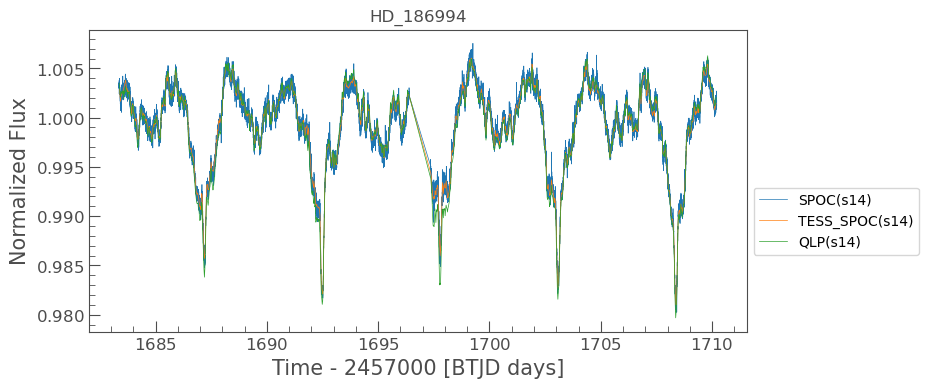

In [33]:
%matplotlib inline
lc.plot(normalize=True)
plt.title(name)
plt.legend(["SPOC(s14)","TESS_SPOC(s14)", "QLP(s14)"], bbox_to_anchor=(1, 0.5));
#plt.xlim(1685,1690)

In [34]:
lc = lc[1].flatten()
lc.interact_bls()

Text(0.5, 1.0, 'HD_186994')

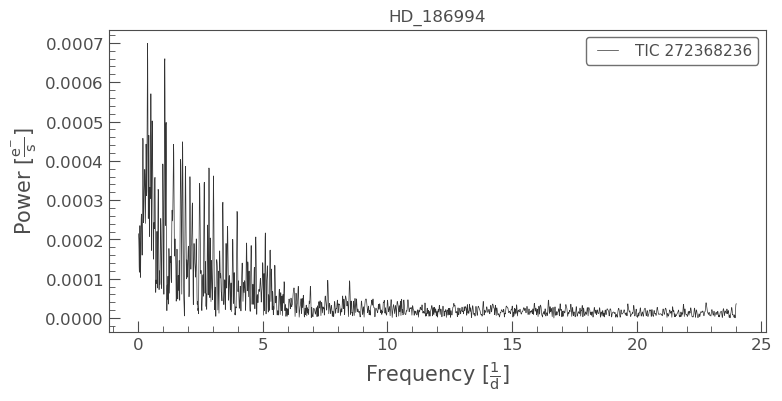

In [35]:
pg = lc.to_periodogram()
pg.plot()
plt.title(name)

In [36]:
p = lc.remove_nans().to_periodogram(method='LombScargle')

In [37]:
p

LombScarglePeriodogram(ID: TIC 272368236)

Text(0.5, 1.0, 'HD_186994')

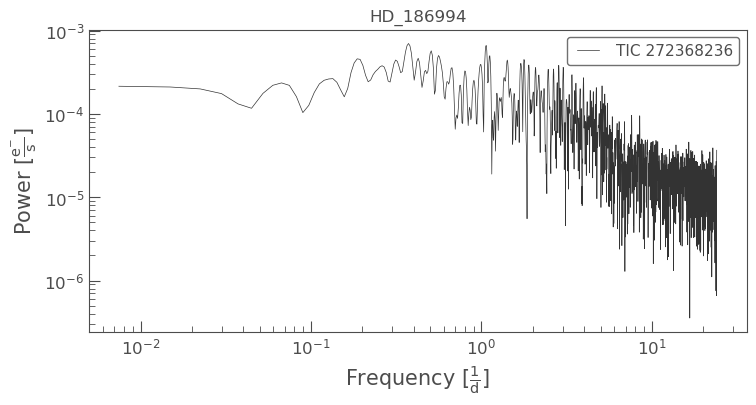

In [38]:
p.plot(scale='log')
plt.title(name)

In [39]:
p.period_at_max_power

<Quantity 2.67917984 d>

Text(0.5, 1.0, 'HD_186994')

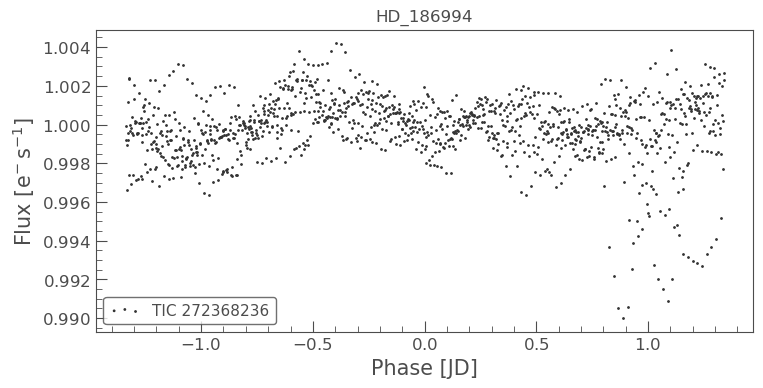

In [40]:
lc.fold(p.period_at_max_power.value).scatter();
plt.title(name)

Text(0.5, 1.0, 'HD_186994')

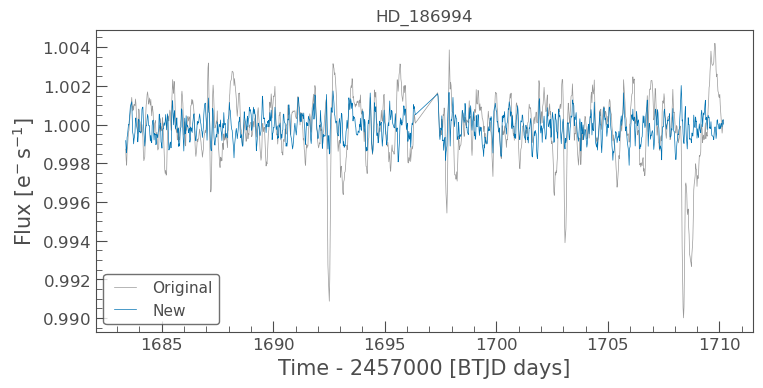

In [41]:
planet_period = p.period_at_max_power.value
newlc = lc.copy()
for i in range(50):
  pg = newlc.to_periodogram()
  model = pg.model(time=newlc.time, frequency=pg.frequency_at_max_power)
  newlc.flux = newlc.flux / model.flux

ax = lc.plot(alpha=.5, label='Original');
newlc.plot(ax=ax, label='New');
plt.title(name)

Text(0.5, 1.0, 'HD_186994')

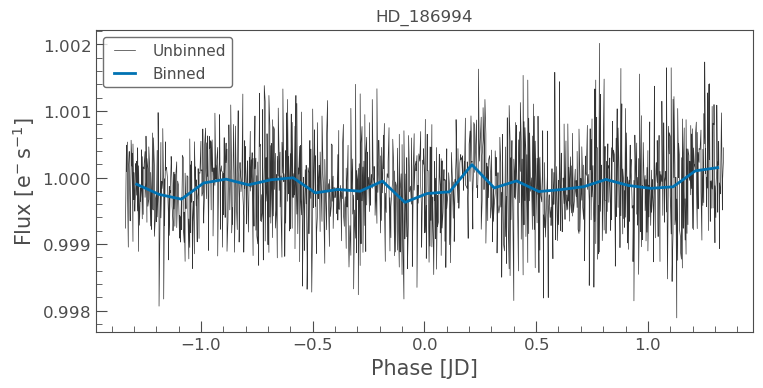

In [42]:
ax = newlc.fold(period=planet_period).plot(label='Unbinned')
newlc.fold(period=planet_period).bin(0.1).plot(ax=ax, lw=2, label='Binned');
plt.title(name)